In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("/content/student-mat.csv") # set the path 

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


#Final grade

In [ ]:
data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


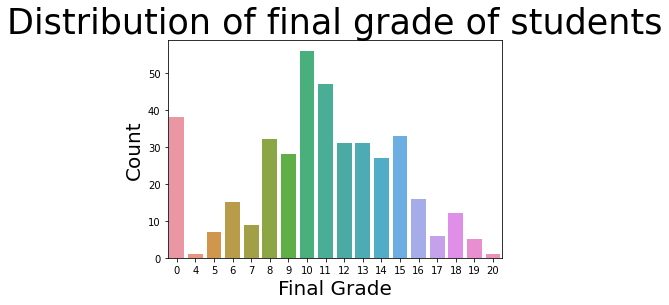

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
b = sns.countplot(data['G3'])
b.axes.set_title('Distribution of final grade of students', fontsize = 35)
b.set_xlabel('Final Grade', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

In [ ]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
data.shape # (row,column)

(395, 33)

In [ ]:
data.isnull().any() # find no of null spaces in the dataset

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [ ]:
data.isnull().sum()  # sum all the null values in the dataset

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
male_student = len(data[data['sex']=='M'])
female_student = len(data[data['sex']=='F'])
print('Number of male students: ',male_student)
print('Number of female students: ',female_student)

Number of male students:  187
Number of female students:  208


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of students in diff age grps')

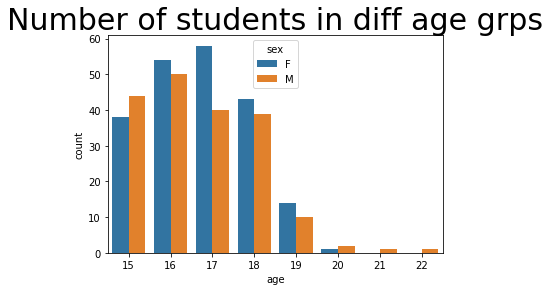

In [ ]:
b = sns.countplot('age', hue='sex', data=data)
b.axes.set_title('Number of students in diff age grps',fontsize=30)

let's create one more column to get the average grade from G1 to G3 (3 years average):

In [ ]:
data['GradeAvg'] = (data['G1'] + data['G2'] + data['G3'])/3

Next, we can drop school name and age feature because it is not a computational value

In [ ]:
data.drop(["school","age"], axis=1, inplace=True)

In [ ]:
data.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeAvg
0,F,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,3
1,F,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,3
2,F,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,3
3,F,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,2
4,F,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,3


In [ ]:
data_dum=data

In [ ]:
#Converting to categorical value
categorical_d = {'yes': 1, 'no': 0}
data_dum['schoolsup'] = data_dum['schoolsup'].map(categorical_d)
data_dum['famsup'] = data_dum['famsup'].map(categorical_d)
data_dum['paid'] = data_dum['paid'].map(categorical_d)
data_dum['activities'] = data_dum['activities'].map(categorical_d)
data_dum['nursery'] = data_dum['nursery'].map(categorical_d)
data_dum['higher'] = data_dum['higher'].map(categorical_d)
data_dum['internet'] = data_dum['internet'].map(categorical_d)
data_dum['romantic'] = data_dum['romantic'].map(categorical_d)

In [ ]:
categorical_d = {'F': 1, 'M': 0}
data_dum['sex'] = data_dum['sex'].map(categorical_d)

# map the address data
categorical_d = {'U': 1, 'R': 0}
data_dum['address'] = data_dum['address'].map(categorical_d)

# map the famili size data
categorical_d = {'LE3': 1, 'GT3': 0}
data_dum['famsize'] = data_dum['famsize'].map(categorical_d)

# map the parent's status
categorical_d= {'T': 1, 'A': 0}
data_dum['Pstatus'] = data_dum['Pstatus'].map(categorical_d)

# map the parent's job
categorical_d = {'teacher': 0, 'health': 1, 'services': 2,'at_home': 3,'other': 4}
data_dum['Mjob'] = data_dum['Mjob'].map(categorical_d)
data_dum['Fjob'] = data_dum['Fjob'].map(categorical_d)

# map the reason data
categorical_d= {'home': 0, 'reputation': 1, 'course': 2,'other': 3}
data_dum['reason'] = data_dum['reason'].map(categorical_d)

# map the guardian data
categorical_d = {'mother': 0, 'father': 1, 'other': 2}
data_dum['guardian'] = data_dum['guardian'].map(categorical_d)


In [ ]:
data_dum.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'GradeAvg'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x=data_dum.drop("G3",axis=1)
y=data_dum['G3']
data_dum['G3']

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

#Splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=44)

In [ ]:
# we can use all libraries of ml using scikt learn
from sklearn.linear_model import LinearRegression  
L=LinearRegression()

##Training the dataset

In [ ]:
L.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting values

In [ ]:
y_pred=L.predict(X_test) 

Printing output (predicted values)

In [ ]:
print(L.score(X_test, y_test)) 

0.8543574102143001


We got an output of 0.8543574102143001